<a href="https://colab.research.google.com/github/JurijJusel/Image/blob/t11-CNN-model/CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
# from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout



In [3]:
# connect to dataset in google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load data


In [4]:
augmented_data_path = '/content/drive/MyDrive/Colab Notebooks/Image/data/augmented/train/'
validate_data_path =  '/content/drive/MyDrive/Colab Notebooks/Image/data/augmented/validate/'

In [5]:
data=tf.keras.utils.image_dataset_from_directory(augmented_data_path)
validate_data=tf.keras.utils.image_dataset_from_directory(validate_data_path)

Found 3567 files belonging to 2 classes.
Found 603 files belonging to 2 classes.


In [6]:
data_iterator = data.as_numpy_iterator()

In [7]:
batch = data_iterator.next()

In [8]:
batch[0].shape

(32, 256, 256, 3)

In [9]:
batch[1]

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0], dtype=int32)

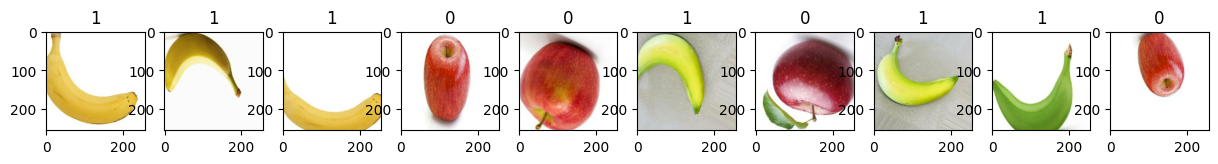

In [10]:
fig, ax = plt.subplots(ncols=10, figsize=(15,15))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Data preprocessing

In [11]:
# Scale Data
data_scale = data.map(lambda x, y:(x/255, y))
validate_data_scale=validate_data.map(lambda x, y:(x/255, y))

In [12]:
scaled_iterator = data_scale.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].min()

0.0

In [ ]:
batch[0].max()

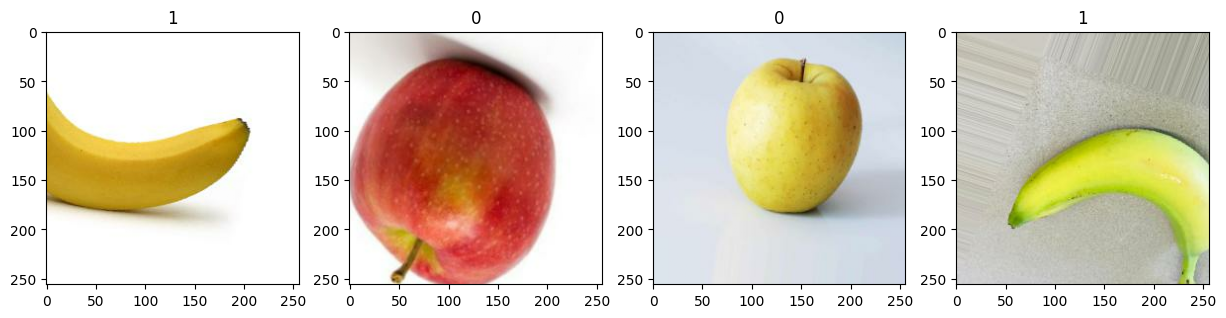

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(15,15))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [21]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

# Train model

In [23]:
history = model.fit(data_scale, epochs=5, validation_data=validate_data_scale)

Epoch 1/5
112/112 [==============================] - 281s 2s/step - loss: 0.0330 - accuracy: 0.9893 - val_loss: 0.0198 - val_accuracy: 0.9917
Epoch 2/5
112/112 [==============================] - 278s 2s/step - loss: 0.0089 - accuracy: 0.9966 - val_loss: 2.0499e-04 - val_accuracy: 1.0000
Epoch 3/5
112/112 [==============================] - 275s 2s/step - loss: 9.8568e-04 - accuracy: 1.0000 - val_loss: 1.0776e-04 - val_accuracy: 1.0000
Epoch 4/5
112/112 [==============================] - 275s 2s/step - loss: 2.6713e-05 - accuracy: 1.0000 - val_loss: 3.6729e-05 - val_accuracy: 1.0000
Epoch 5/5
112/112 [==============================] - 276s 2s/step - loss: 1.6935e-05 - accuracy: 1.0000 - val_loss: 2.7107e-05 - val_accuracy: 1.0000


In [24]:
history.history

{'loss': [0.033000025898218155,
  0.008902620524168015,
  0.0009856763062998652,
  2.6713307306636125e-05,
  1.6935055100475438e-05],
 'accuracy': [0.9893468022346497, 0.9966358542442322, 1.0, 1.0, 1.0],
 'val_loss': [0.01981928013265133,
  0.00020499451784417033,
  0.0001077568595064804,
  3.672851016744971e-05,
  2.7106658308184706e-05],
 'val_accuracy': [0.9917080998420715, 1.0, 1.0, 1.0, 1.0]}

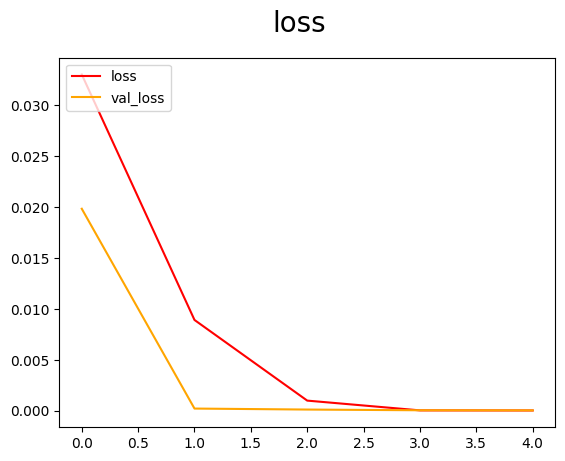

In [25]:
#Plot Performance
fig=plt.figure()
plt.plot(history.history['loss'], color='red', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

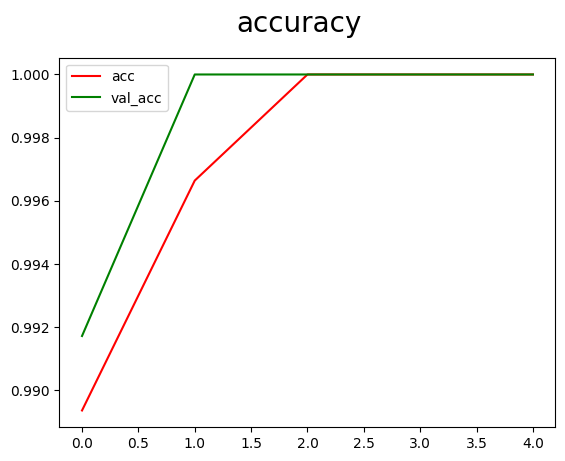

In [26]:
fig=plt.figure()
plt.plot(history.history['accuracy'], color='red', label='acc')
plt.plot(history.history['val_accuracy'], color='green', label='val_acc')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate perfomance

In [68]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [69]:
pre = Precision()
re = Recall()
acc =BinaryAccuracy()

# Test image

In [35]:
import cv2
import matplotlib.pyplot as plt


In [60]:
user_image='/content/drive/MyDrive/Colab Notebooks/Image/dataset/apple/Image_69.jpg'  # apple
# user_image='/content/drive/MyDrive/Colab Notebooks/Image/dataset/banana/Image_95.jpg'  # banana

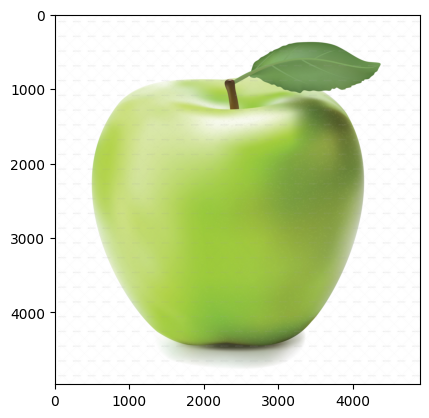

In [61]:
img_read = cv2.imread(user_image)
plt.imshow(cv2.cvtColor(img_read,cv2.COLOR_BGR2RGB))
plt.show()
# img_path

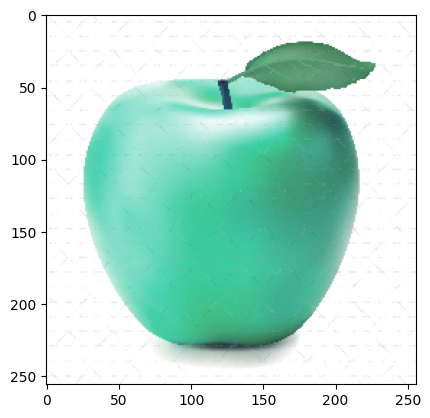

In [62]:
img_resize = cv2.resize(img_read, (256, 256))
plt.imshow(img_resize)
plt.show()

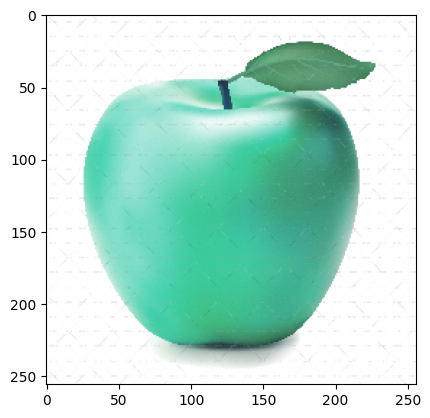

In [50]:
img_resize = tf.image.resize(img_read, (256, 256))
plt.imshow(img_resize.numpy().astype(int))
plt.show()

In [43]:
# np_exp= np.expand_dims(img_resize,0).shape

In [63]:
img_array = np.array(img_resize) / 255.0  # normalize pixel values
img_expanded = np.expand_dims(img_array, axis=0)  # expand dimensions to match input shape


In [64]:
predict_model = model.predict(img_expanded)
predict_model

1/1 [==============================] - 0s 46ms/step


array([[0.9991496]], dtype=float32)



# Save model

In [28]:
model.save('/content/drive/MyDrive/Colab Notebooks/Image/models/cnn_model.h5')

# Load model


In [65]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/Image/models/cnn_model.h5')

In [66]:
predictions = model.predict(img_expanded)
predictions

1/1 [==============================] - 0s 157ms/step


array([[0.9991496]], dtype=float32)